In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [55]:
data_org_01 = pd.read_csv('../data/testing_orignial_framebuffer_disabled/Curve0.1Hz_0.csv')
data_org_02 = pd.read_csv('../data/testing_orignial_framebuffer_disabled/Curve0.2Hz_4.csv')
data_org_03 = pd.read_csv('../data/testing_orignial_framebuffer_disabled/Curve0.3Hz_0.csv')

data_org_01['Angle'] = data_org_01['Angle'] - ((min(data_org_01['Angle']) + max(data_org_01['Angle'])) / 2)
data_org_02['Angle'] = data_org_02['Angle'] - ((min(data_org_02['Angle']) + max(data_org_02['Angle'])) / 2)
data_org_03['Angle'] = data_org_03['Angle'] - ((min(data_org_03['Angle']) + max(data_org_03['Angle'])) / 2)

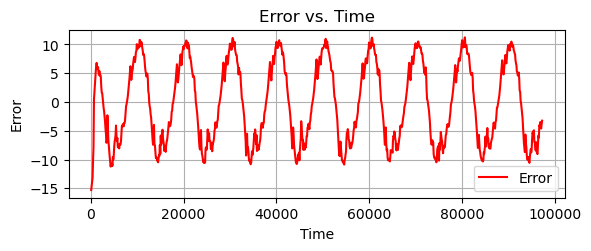

In [56]:
plt.subplot(2, 1, 1)
plt.plot(data_org_01['Time'], data_org_01['Error'], label='Error', color='red')
plt.title('Error vs. Time')
plt.xlabel('Time')
plt.ylabel('Error')
plt.legend()
plt.grid(True)

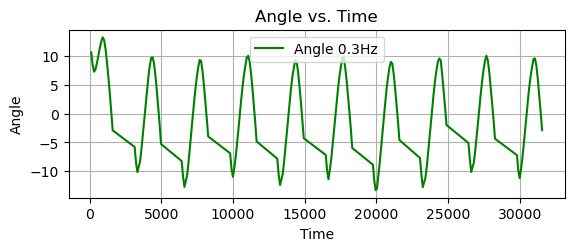

In [ ]:
plt.subplot(2, 1, 1)
plt.plot(data_org_01['Time'], data_org_01['Angle'], label='Angle 0.1Hz', color='red')
# plt.plot(data_org_02['Time'], data_org_02['Angle'], label='Angle 0.2Hz', color='blue')
# plt.plot(data_org_03['Time'], data_org_03['Angle'], label='Angle 0.3Hz', color='green')
plt.title('Angle vs. Time')
plt.xlabel('Time')
plt.ylabel('Angle')
plt.legend()
plt.grid(True)

Text(0, 0.5, 'Magnitude')

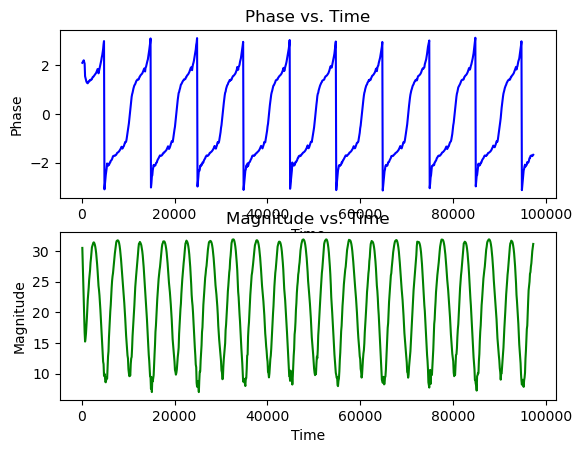

In [61]:
# Get phase form the angle 
phase = np.arctan2(data_org_01['Angle'], data_org_01['Error'])
plt.subplot(2, 1, 1)
plt.plot(data_org_01['Time'], phase, label='Phase', color='blue')
plt.title('Phase vs. Time')
plt.xlabel('Time')
plt.ylabel('Phase')
# Magnitude of the phase
magnitude = np.sqrt((data_org_01['Angle'])**2 + data_org_01['Error']**2)
plt.subplot(2, 1, 2)
plt.plot(data_org_01['Time'], magnitude, label='Magnitude', color='green')
plt.title('Magnitude vs. Time')
plt.xlabel('Time')
plt.ylabel('Magnitude')

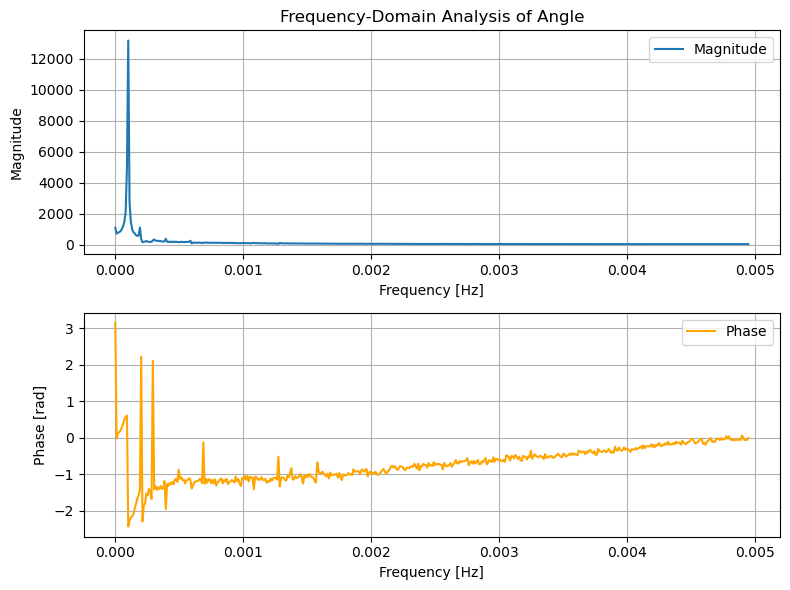

In [67]:
import numpy as np
import matplotlib.pyplot as plt

# Suppose your pandas DataFrame is called data_org_01
# and it has columns: 'Time', 'Angle', 'Error'
# We will just analyze 'Angle' here as an example.

time = data_org_01['Time'].values
angle = (data_org_01['Angle']).values

# 1. Determine sampling parameters
N = len(time)                      # Number of samples
dt = time[1] - time[0]            # Time step (assuming uniform sampling)
fs = 1.0 / dt                      # Sampling frequency in Hz

# 2. Compute the FFT of 'angle'
fft_vals = np.fft.rfft(angle)      
freqs = np.fft.rfftfreq(N, dt)     

# 3. Compute magnitude and phase
magnitude = np.abs(fft_vals)
phase = np.angle(fft_vals)         # Phase in radians

# 4. Plot Magnitude and Phase vs Frequency
plt.figure(figsize=(8, 6))

plt.subplot(2, 1, 1)
plt.plot(freqs, magnitude, label='Magnitude')
plt.title('Frequency-Domain Analysis of Angle')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(freqs, phase, label='Phase', color='orange')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Phase [rad]')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
